# Low-Rank Approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

## Part a)

In [2]:
face = imread("./data/face.jpg")

In [3]:
def low_rank_approximation(X, rank):
    
    U, Sig, V = np.linalg.svd(X, full_matrices=False)
    Sig[rank:] = 0
    Sig_matrix = Sig*np.identity(len(Sig))
    M_reduced = U @ Sig_matrix @ V
    
    return M_reduced

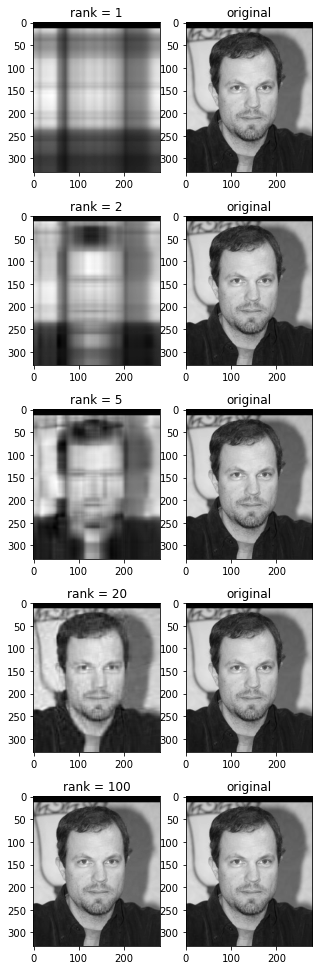

In [4]:
img = face
fig = plt.figure(figsize=(5, 35))

ranks = [1,2,5,20,100]
n = len(ranks)
for i, rank in enumerate(ranks):
    img_reduced = low_rank_approximation(img,rank)
    
    fig.add_subplot(n*2,2,2*i+1)
    plt.imshow(img_reduced, cmap='gray')
    plt.title('rank = ' + str(rank))
    
    fig.add_subplot(n*2,2,2*i+2)
    plt.imshow(img, cmap='gray')
    plt.title('original')
    
    
plt.show()

## Part b)

In [5]:
sky = imread("./data/sky.jpg")

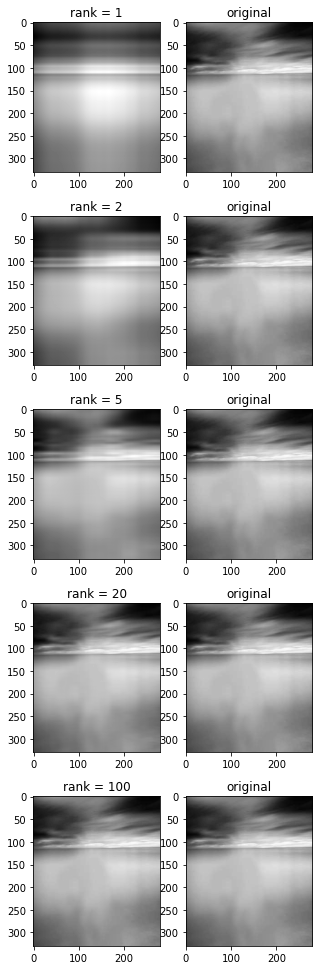

In [6]:
img = sky
fig = plt.figure(figsize=(5, 35))

ranks = [1,2,5,20,100]
n = len(ranks)
for i, rank in enumerate(ranks):
    img_reduced = low_rank_approximation(img,rank)
    
    fig.add_subplot(n*2,2,2*i+1)
    plt.imshow(img_reduced, cmap='gray')
    plt.title('rank = ' + str(rank))
    
    fig.add_subplot(n*2,2,2*i+2)
    plt.imshow(img, cmap='gray')
    plt.title('original')
    
    
plt.show()

## Part c)

In [7]:
def mse(img1, img2):
    
    img1, img2 = img1+0.0, img2+0.0
    MSE = np.sum((img1-img2)**2)
      
    return MSE

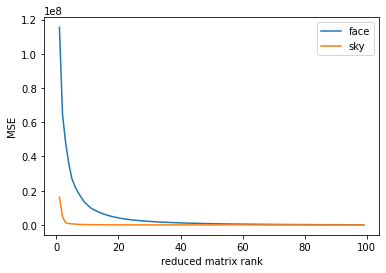

In [8]:
img_1 = face
img_2 = sky
Range = range(1,100)

MSE_list_1 = []
MSE_list_2 = []
for i in Range:
    img_reduced_1 = low_rank_approximation(img_1,i)
    img_reduced_2 = low_rank_approximation(img_2,i)
    MSE_1 = mse(img_1,img_reduced_1)
    MSE_2 = mse(img_2,img_reduced_2)    
    MSE_list_1.append(MSE_1)
    MSE_list_2.append(MSE_2)
    
ax1 = plt.plot(Range,MSE_list_1)
ax2 = plt.plot(Range,MSE_list_2)

plt.legend(['face','sky'])
plt.xlabel('reduced matrix rank')
plt.ylabel('MSE')
plt.show()

## Part d)

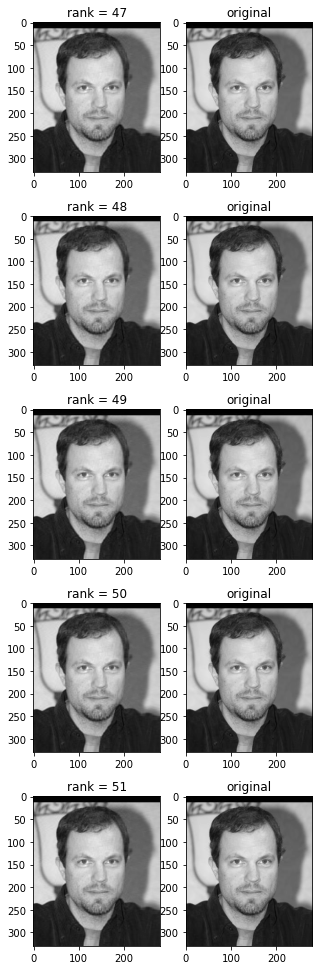

In [13]:
img = face
fig = plt.figure(figsize=(5, 35))

ranks = range(47,52)
n = len(ranks)
for i, rank in enumerate(ranks):
    img_reduced = low_rank_approximation(img,rank)
    
    fig.add_subplot(n*2,2,2*i+1)
    plt.imshow(img_reduced, cmap='gray')
    plt.title('rank = ' + str(rank))
    
    fig.add_subplot(n*2,2,2*i+2)
    plt.imshow(img, cmap='gray')
    plt.title('original')
    
    
plt.show()

I find rank 51 to be slightly noisier than the original image, however I start having a hard time to differentiate.

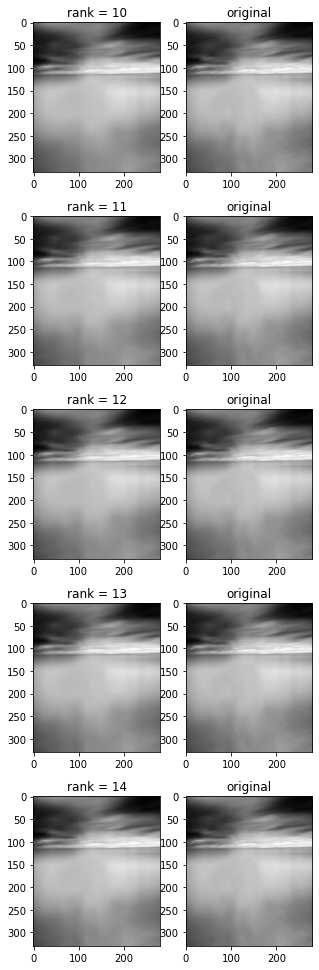

In [15]:
img = sky
fig = plt.figure(figsize=(5, 35))

ranks = range(10,15)
n = len(ranks)
for i, rank in enumerate(ranks):
    img_reduced = low_rank_approximation(img,rank)
    
    fig.add_subplot(n*2,2,2*i+1)
    plt.imshow(img_reduced, cmap='gray')
    plt.title('rank = ' + str(rank))
    
    fig.add_subplot(n*2,2,2*i+2)
    plt.imshow(img, cmap='gray')
    plt.title('original')
    
    
plt.show()

While rank 10 looks a bit blurry, I cannot differentiate rank 14 from the original. I think this is due to the sky image having way less details.